# Notebook to:

In [38]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
from copy import deepcopy
from nilearn._utils.glm import z_score
import scipy.stats as sps

from nilearn.glm import threshold_stats_img
from nilearn.plotting import plot_stat_map

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
#from https://github.com/neuroscout/neuroscout-paper/blob/master/book/utils.py
def t_to_z(t_map, dof):
    # From nilearn.glm
    old_shape = t_map.get_fdata().shape
    data = t_map.get_fdata().flatten()
    new_img = deepcopy(t_map)
    baseline = 0
    p_value = sps.t.sf(data, dof)
    
    one_minus_pvalues = sps.t.cdf(data, dof)
        
    # Avoid inf values kindly supplied by scipy.
    z_scores = z_score(p_value, one_minus_pvalue=one_minus_pvalues)
    
    z_scores = z_scores.reshape(old_shape)
    
    new_img.get_fdata()[:] = z_scores
    
    return new_img

## FACE_PLOTS - GROUP

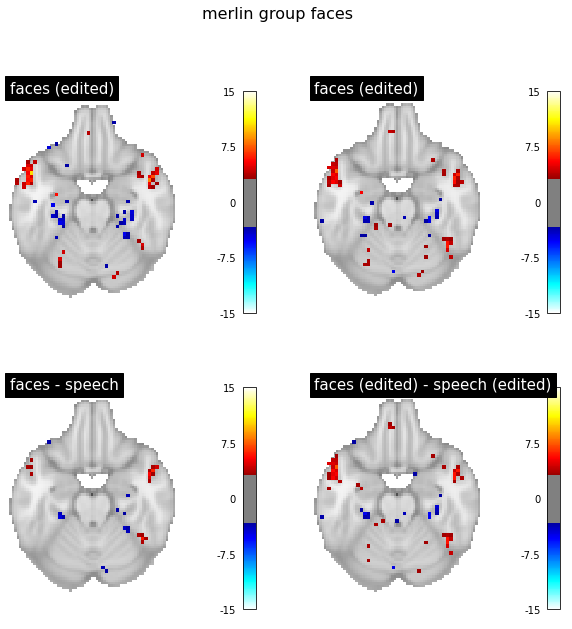

In [42]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-10], vmax=15, annotate=False)
plot_args = dict(display_mode='z', cut_coords=[-22], vmax=15, annotate=False)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
dow='Sat'
n_subjects = 18

ax=axs[0,0] # FACES
analysis_id='ht7zz'
feature='anyFaces'
suptitle='faces (edited)'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

ax=axs[0,1] # FACES Edited
analysis_id='qwgbn'
feature='anyFacesEdited'
suptitle='faces (edited)'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

ax=axs[1,0] # FACES - SPEECH
analysis_id='f6gsn'
feature='anyFaces'
suptitle='faces - speech'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

ax=axs[1,1] # FACESedited - SPEECHedited
analysis_id='npqie'
feature='anyFacesEdited'
suptitle='faces (edited) - speech (edited)'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

fig.suptitle('merlin group faces', fontsize=16)


plt.savefig('/om2/scratch/Sat/jsmentch/feature_viz_paper/plots/merlin_faces_group.png')

## FACE_PLOTS - SINGLE SUBJECT

In [43]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-10], vmax=15, annotate=False)
plot_args = dict(display_mode='z', cut_coords=[-22], vmax=15, annotate=False)

n_subjects = 18
dow='Sat'
#print('False Discovery rate = 0.05 threshold: %.3f' % threshold)

for sub in np.arange(19,37):
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
    
    ax=axs[0,0] # FACES
    analysis_id='ht7zz'
    feature='anyFaces'
    suptitle='faces'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    ax=axs[0,1] # FACES Edited
    analysis_id='qwgbn'
    feature='anyFacesEdited'
    suptitle='faces (edited)'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    ax=axs[1,0] # FACES - SPEECH
    analysis_id='f6gsn'
    feature='anyFaces'
    suptitle='faces - speech'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    ax=axs[1,1] # FACESedited - SPEECHedited
    analysis_id='npqie'
    feature='anyFacesEdited'
    suptitle='faces (edited) - speech (edited)'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    fig.suptitle(f'merlin sub-{sub} faces', fontsize=16)

    plt.savefig(f'/om2/scratch/Sat/jsmentch/feature_viz_paper/plots/merlin_faces/sub-{sub}.png')
    plt.clf()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

## SPEECH PLOTS - GROUP

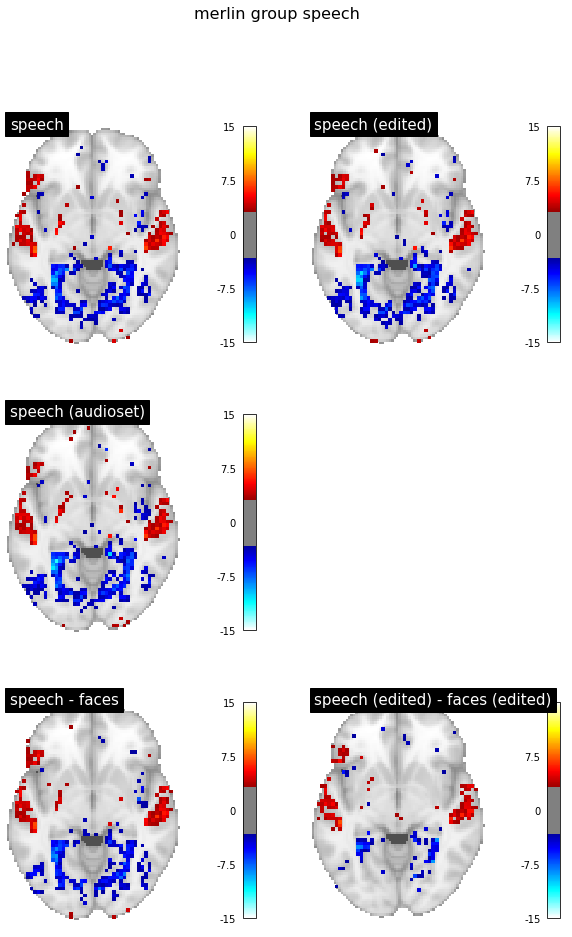

In [46]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-10], vmax=15, annotate=False)
plot_args = dict(display_mode='z', cut_coords=[-6], vmax=15, annotate=False)

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 15))
dow='Sat'
n_subjects = 18

ax=axs[0,0] # SPEECH
analysis_id='r2gtf'
feature='speech'
suptitle='speech'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

ax=axs[0,1] # SPEECH Edited
analysis_id='gdzft'
feature='speechEdited'
suptitle='speech (edited)'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

ax=axs[1,0] # AS-SPEECH
analysis_id='gbns6'
feature='asSpeech'
suptitle='speech (audioset)'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

axs[1,1].axis('off')

ax=axs[2,0] # speech-faces
analysis_id='f6gsn'
feature='speech'
suptitle='speech - faces'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

ax=axs[2,1] # speech edited -faces edited
analysis_id='npqie'
feature='speechEdited'
suptitle='speech (edited) - faces (edited)'
fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-{feature}_stat-t_statmap.nii.gz'
t_map = nib.load(brain_img)
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

fig.suptitle('merlin group speech', fontsize=16)

plt.savefig('/om2/scratch/Sat/jsmentch/feature_viz_paper/plots/merlin_speech_group.png')

## SPEECH PLOTS - SINGLE SUBJECT

In [47]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-10], vmax=15, annotate=False)
plot_args = dict(display_mode='z', cut_coords=[-6], vmax=15, annotate=False)

n_subjects = 18
dow='Sat'
#print('False Discovery rate = 0.05 threshold: %.3f' % threshold)

for sub in np.arange(19,37):
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 15))
    
    ax=axs[0,0] # SPEECH
    analysis_id='r2gtf'
    feature='speech'
    suptitle='speech'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    ax=axs[0,1] # SPEECH Edited
    analysis_id='gdzft'
    feature='speechEdited'
    suptitle='speech (edited)'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    ax=axs[1,0] # AS-SPEECH
    analysis_id='gbns6'
    feature='asSpeech'
    suptitle='speech (audioset)'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    axs[1,1].axis('off')

    ax=axs[2,0] # speech-faces
    analysis_id='f6gsn'
    feature='speech'
    suptitle='speech - faces'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    ax=axs[2,1] # speech edited -faces edited
    analysis_id='npqie'
    feature='speechEdited'
    suptitle='speech (edited) - faces (edited)'
    fitlins_dir=f'/om2/scratch/{dow}/jsmentch/feature_viz_paper/outputs/neuroscout-{analysis_id}/fitlins/sub-{sub}/'
    brain_img=f'{fitlins_dir}level-run_name-run_sub-{sub}_contrast-{feature}_stat-z_statmap.nii.gz'
    z_map = nib.load(brain_img)
    thresh_z_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(thresh_z_map, threshold=thresh, title=f"{suptitle}", **plot_args, axes=ax)

    fig.suptitle(f'merlin sub-{sub} speech', fontsize=16)

    plt.savefig(f'/om2/scratch/Sat/jsmentch/feature_viz_paper/plots/merlin_speech/sub-{sub}.png')
    plt.clf()

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>